In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [54]:
# Read in both CSVs
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

In [55]:
df_red.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [56]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
## Data Cleaning 

In [58]:
# Compile lists containing null / na analyses, along with dType determinations

# Red, Null
null_red = list(df_red.isnull().sum())
null_red.extend(["Count Null","red"])

# White, Null
null_white = list(df_white.isnull().sum())
null_white.extend(["Count Null","white"])

# Red, NA
na_red = list(df_red.isna().sum())
na_red.extend(["Count NA","red"])

# White, NA
na_white = list(df_white.isna().sum())
na_white.extend(["Count NA","white"])

# Red dTypes
red_types = [x.name for x in df_red.dtypes]
red_types.extend(["dType","red"])

# White dTypes
white_types = [x.name for x in df_white.dtypes]
white_types.extend(["dType","white"])

# List of measurements by which the wine was analyzed
chem_analyses = list(df_white.columns.values)
chem_analyses.extend(["Analysis","Wine Type"])

In [59]:
# Missing Data

def percent_missing(data):
    return data.isnull().sum().divide(len(data)).sort_values(ascending=False)

percent_missing(df_red).head()
percent_missing(df_white).head()


fixed acidity       0.0
volatile acidity    0.0
citric acid         0.0
residual sugar      0.0
chlorides           0.0
dtype: float64

In [60]:
# Observations
# There are no null values in the given data set

In [61]:
# Create DF with lists
analysis_df = pd.DataFrame([null_red,null_white,na_red,na_white,red_types,white_types],columns=chem_analyses)

In [62]:
# Set index to make multi-indexed DF
analysis_df.set_index(["Wine Type","Analysis"]).sort_index()

fixed acidity volatile acidity citric acid  \
Wine Type Analysis                                                
red       Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   
white     Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   

                     residual sugar chlorides free sulfur dioxide  \
Wine Type Analysis                                                  
red       Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   
white     Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   

                     total sulfur dioxide  density       pH sulphates  \
Wine Type Analysis                                                      
red       Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   
white     Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   

                      alcohol quality  
Wine Type Analysis                     
red       Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64  
white     Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64

In [63]:
# Observations
# This section helps us to identify attributes data type as well

In [64]:
## Data Exploration

In [65]:
# Quality 

In [66]:
# Add column to label wine type
df_red["type"] = 'red'
df_white["type"] = 'white'

In [67]:
# Quality Score Distribution 

In [68]:
# Count number of values per score, per wine type (normalize creates a percent of total value)
red_quality = df_red['quality'].value_counts(normalize=True)
white_quality = df_white['quality'].value_counts(normalize=True)

In [69]:
# Create empty DF for both wine types, and quality scores from 1 to 10
quality_perc = pd.DataFrame(columns=('Red','White'),index=list(range(1,11)))

# Input quality counts to DF
quality_perc['Red'] = red_quality
quality_perc['White'] = white_quality

# Fill blanks with 0's
quality_perc.fillna(0,inplace=True)

quality_perc

,Red,White
1,0.000000,0.000000
2,0.000000,0.000000
3,0.006254,0.004083
4,0.033146,0.033279
5,0.425891,0.297468
6,0.398999,0.448755
7,0.124453,0.179665
8,0.011257,0.035729
9,0.000000,0.001021
10,0.000000,0.000000


Text(0, 0.5, '% of Total Wines, by Type')

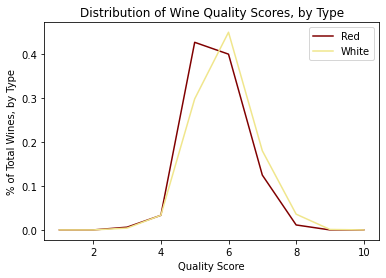

In [70]:
# Visualize 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

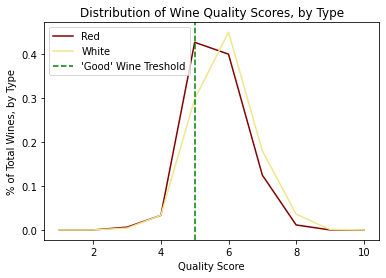

In [71]:
# Determine "Good" wine threshold 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

# threshold at 5
plt.axvline(5, color='g',linestyle='--')
plt.legend(["Red", "White","'Good' Wine Treshold"]);

In [72]:
# Preprocessing 

In [73]:
## Add Classification Column 

In [74]:
# If wine >= 5, label it "good"

df_red['class'] = ['good' if x >=5 else 'bad' for x in df_red['quality']]
df_white['class'] = ['good' if x >=5 else 'bad' for x in df_white['quality']]

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,good


In [75]:
# Read in both CSVs

df_red.to_csv('red_classified.csv')
df_white.to_csv('white_classified.csv')

In [76]:
# Combine Dataframes

In [77]:
df_combined = df_red.append(df_white)
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,good
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,good
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,good
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,good


In [78]:
df_combined.to_csv('combined_and_classified')

In [79]:
df_combined.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [80]:
# Data Exploration, Continued

In [81]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [82]:
df_combined = pd.concat([df_combined], axis=1)

print("Number of rows BEFORE merging:", df_red.shape[0])
print("Number of columns BEFORE merging:", df_red.shape[1])

print("Number of rows BEFORE merging:", df_white.shape[0])
print("Number of columns BEFORE merging:", df_white.shape[1])

print("\nNumber of rows AFTER merging:", df_combined.shape[0])
print("Number of columns AFTER merging:", df_combined.shape[1])


Number of rows BEFORE merging: 1599
Number of columns BEFORE merging: 14
Number of rows BEFORE merging: 4898
Number of columns BEFORE merging: 14

Number of rows AFTER merging: 6497
Number of columns AFTER merging: 14


In [83]:
# Get the number of white and red
new_count = df_combined.groupby(["type"]).count()["class"]
new_count.head()

type
red      1599
white    4898
Name: class, dtype: int64

In [84]:
# Get average quality
avg = df_combined.groupby(["type"]).mean()["quality"]
avg.head()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [85]:
# Get average pH
avg = df_combined.groupby(["type"]).mean()["pH"]
avg.head()

type
red      3.311113
white    3.188267
Name: pH, dtype: float64

In [86]:
# Add Dummy Variables 

In [87]:
def change_column(column): 
    if column == 'red':
        return 0
    if column == 'white':
        return 1

In [88]:
df_combined['type'] = df_combined['type'].apply(change_column)

In [89]:
def change_columns(column): 
    if column == 'bad':
        return 0
    if column == 'good':
        return 1

In [90]:
df_combined['class'] = df_combined['class'].apply(change_columns)

In [91]:
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [92]:
# Outliers

In [93]:
df_combined.describe()[['quality','alcohol','sulphates','density']]

,quality,alcohol,sulphates,density
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,5.818378,10.491801,0.531268,0.994697
std,0.873255,1.192712,0.148806,0.002999
min,3.000000,8.000000,0.220000,0.987110
25%,5.000000,9.500000,0.430000,0.992340
50%,6.000000,10.300000,0.510000,0.994890
75%,6.000000,11.300000,0.600000,0.996990
max,9.000000,14.900000,2.000000,1.038980


In [94]:
# Observations - This step helps us to identify mean, median, min, max and percentages(25,50,75) of feature attributes. 
# 75% of the data has an  alcohol percentage of 14.9
# Minimum value of sulphates is .22 and maximum of 2

In [95]:
# Bar Graphs

<AxesSubplot:>

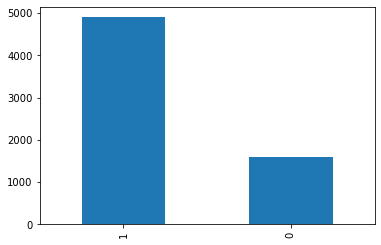

In [96]:
df_combined['type'].value_counts()
df_combined['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

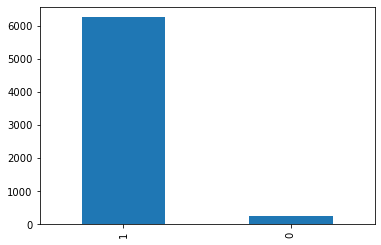

In [97]:
df_combined['class'].value_counts()
df_combined['class'].value_counts().plot(kind='bar')

In [98]:
# Boxplot

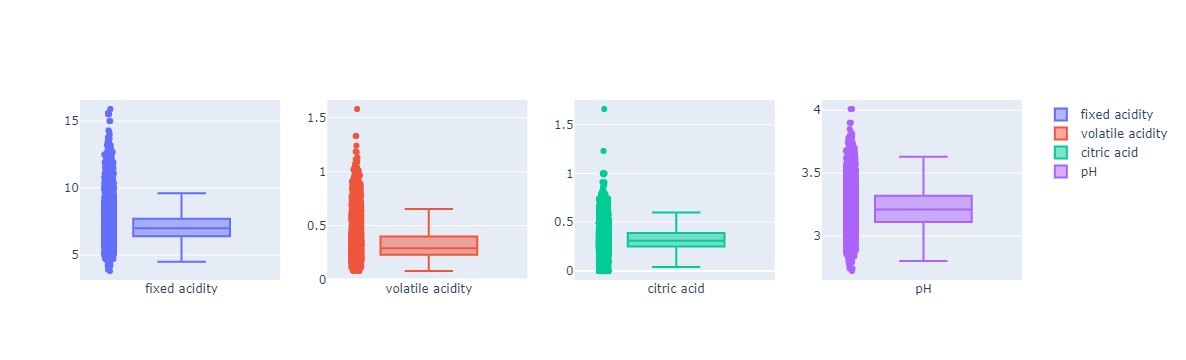

In [99]:
vars = ['fixed acidity', 'volatile acidity', 'citric acid','pH']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.1)

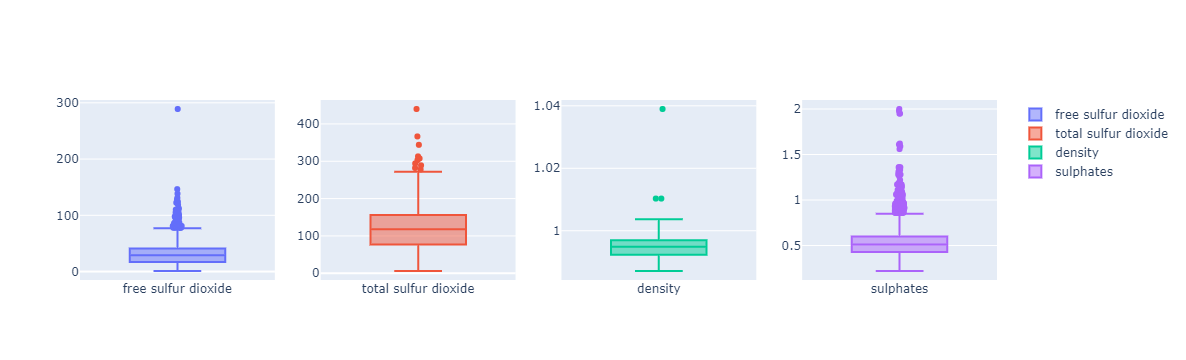

In [100]:
vars = ['free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',]
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='outliers', jitter=.1)

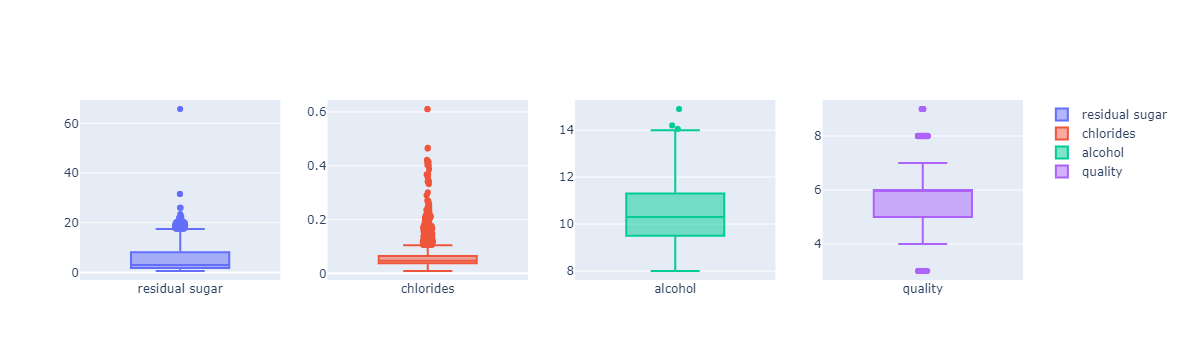

In [101]:
vars = ['residual sugar', 'chlorides', 'alcohol','quality']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df_combined[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='outliers', jitter=.1)

In [102]:
# Scatter

NameError: name 'plot' is not defined

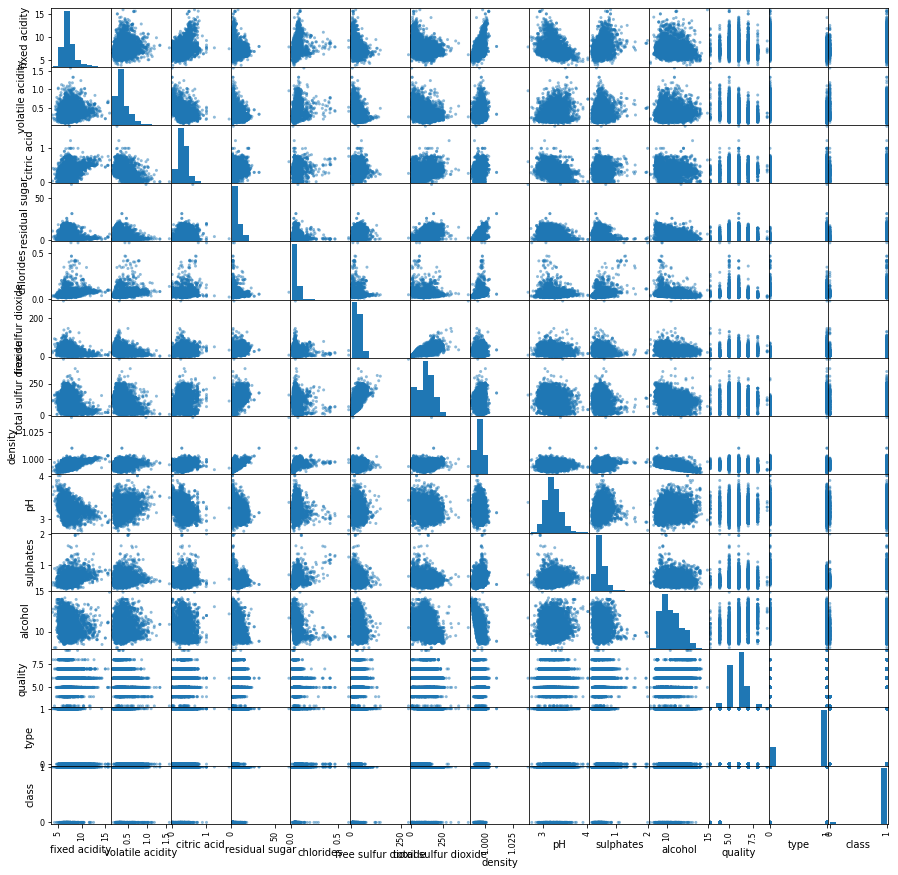

In [103]:
Scatter_df = df_combined[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                      'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol', 'quality','type', 'class']]

pd.plotting.scatter_matrix(Scatter_df, figsize=(15,15), diagonal='hist')

plot.show()

In [104]:
# Observations
# We are able to see how the different values are correlated with each other or not
# Total sulfur and sulfur have a slight linear relationship as the data skews right
# Most of the data shows there isnt a visable linear relationship 

In [105]:
# Heatmap

<AxesSubplot:>

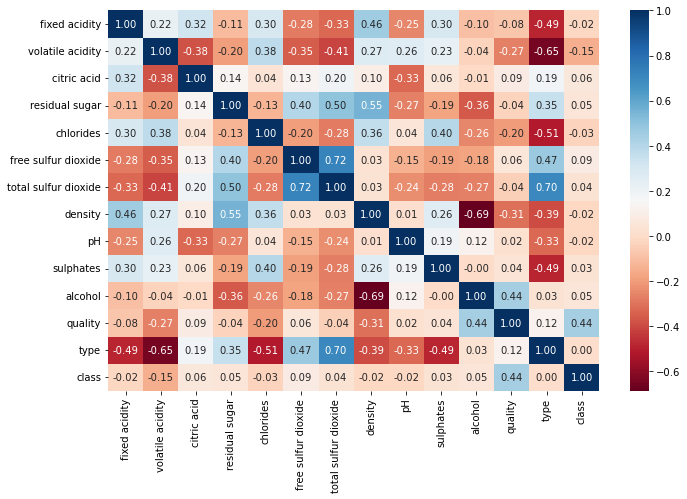

In [106]:
corr = Scatter_df.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")

In [107]:
# Observations
# The higher values are the darker shades and the less are the lighter shades
# From the above chart we can see that free sulfur dioxide, total sulfer dioxide, and type have the highest values 
# From the chart we can also see that the alcohol, density and volatile acidity have the lowest values

In [108]:
# Split into training and testing

In [109]:
# Define features set
X = df_combined.copy().drop(['class', 'quality'],axis=1)

# Define target vector
y = df_combined["class"]

In [110]:
# Partition data into training (80%) and testing (20%)
# Trained on 80 and tested on 20
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

#Standardize independent variables in ALL data (zero mean and unit variance)
std_X_train = StandardScaler().fit_transform(train_X)
std_X_test = StandardScaler().fit_transform(test_X)

std_train_df = pd.DataFrame(std_X_train, columns=train_X.columns)
std_test_df = pd.DataFrame(std_X_test, columns=test_X.columns)

std_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.709188,-1.278263,0.703091,-0.912717,-0.377481,1.815837,0.541157,-1.349405,-0.553688,1.248446,0.590963,0.578165
1,0.139827,1.634953,-2.121268,-0.722000,0.496296,-0.981377,-1.366993,0.931377,1.628990,0.782361,-0.585821,-1.729610
2,-0.632005,-0.367883,-0.330211,1.185177,-0.405668,0.808840,0.576493,1.058458,-0.491326,-0.482728,-1.510436,0.578165
3,0.680109,-0.853419,0.565317,-0.722000,-0.546600,-0.645711,-0.501258,-0.867832,-0.616051,0.049941,0.590963,0.578165
4,0.680109,2.363257,-2.190155,-0.616045,0.693600,-1.037322,-1.614346,1.098590,1.005368,-0.482728,-0.753932,-1.729610
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,1.529123,1.452877,-0.812419,-0.510091,0.693600,-0.869489,-0.006553,1.105278,0.069934,0.382859,-0.837988,-1.729610
5193,-1.249470,-0.367883,-0.261325,-0.255801,-0.349295,1.200450,0.753173,-0.901275,0.818281,-0.615895,0.170683,0.578165
5194,-0.168906,-0.671343,0.703091,-0.065083,-0.405668,0.361286,0.505821,0.162198,1.753715,0.382859,-0.249597,0.578165
5195,-0.014540,1.756337,-2.190155,-0.743190,1.144582,-0.925433,-1.366993,0.687246,0.943005,0.316275,-1.258268,-1.729610


In [111]:
# Logistic Regression Model

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(4872, 12)

In [113]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [114]:
classifier.fit(X_train, y_train)

C:\Users\joroz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=200, random_state=1)

In [115]:
results = pd.DataFrame

In [116]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [117]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9618461538461538


In [118]:
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: class, dtype: int64

In [119]:
# Random Oversampling

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, )

In [121]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)

In [122]:
# Train the Logistic Regression model using the resampled data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [123]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)

In [124]:
# Train the Logistic Regression model using the resampled data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [125]:
# training madel
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

C:\Users\joroz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=1)

In [126]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  43,   23],
       [ 398, 1161]], dtype=int64)

In [127]:
from collections import Counter
Counter(y_resampled)

Counter({1: 4692, 0: 4692})

In [128]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.698111648881373

In [129]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.10      0.65      0.74      0.17      0.70      0.48        66
          1       0.98      0.74      0.65      0.85      0.70      0.49      1559

avg / total       0.94      0.74      0.66      0.82      0.70      0.49      1625



In [130]:
# Under Sampling

In [131]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids
X_resampled, y_resampled = ClusterCentroids(random_state=1).fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({0: 180, 1: 180})

In [132]:
# Train the Logistic Regression model using the resampled data
model= LogisticRegression(solver='lbfgs', random_state = 1)
model.fit(X_resampled, y_resampled)

C:\Users\joroz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=1)

In [133]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6390897428421483

In [134]:
# Display the confusion matrix
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 51,  15],
       [771, 788]], dtype=int64)

In [135]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.06      0.77      0.51      0.11      0.62      0.40        66
          1       0.98      0.51      0.77      0.67      0.62      0.38      1559

avg / total       0.94      0.52      0.76      0.64      0.62      0.38      1625



In [136]:
# Random Forest

In [137]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(n_estimators = 100, random_state = 1)
model =brfc.fit(X_train, y_train)

In [138]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.6390897428421483

In [139]:
# Display the confusion matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  54,   12],
       [ 362, 1197]], dtype=int64)

In [140]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.13      0.82      0.77      0.22      0.79      0.63        66
          1       0.99      0.77      0.82      0.86      0.79      0.63      1559

avg / total       0.96      0.77      0.82      0.84      0.79      0.63      1625



In [141]:
# List the features sorted in descending order by feature importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.14331815350509838, 'free sulfur dioxide'),
 (0.11830779123843743, 'volatile acidity'),
 (0.0994605181344758, 'total sulfur dioxide'),
 (0.0867623292919751, 'sulphates'),
 (0.08670389336099328, 'citric acid'),
 (0.08164409786844679, 'chlorides'),
 (0.07832222062841908, 'pH'),
 (0.07376021755836297, 'residual sugar'),
 (0.07280717441420523, 'density'),
 (0.07272997477930726, 'fixed acidity'),
 (0.07074535689951807, 'alcohol'),
 (0.015438272320760752, 'type')]

In [142]:
# Linear Regression 

In [143]:
print (X_train.shape) # (4872, 12)
print (X_test.shape) # (1625, 12)
print (y_train.shape) # (4872,)
print (y_test.shape) # (1625,)

(4872, 12)
(1625, 12)
(4872,)
(1625,)


In [145]:
df_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1


In [190]:
y = df_combined['free sulfur dioxide']
x1 = df_combined['total sulfur dioxide']

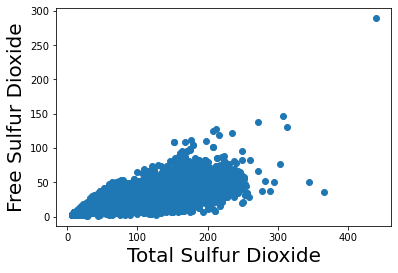

In [191]:
plt.scatter(x1, y)
plt.xlabel('Total Sulfur Dioxide', fontsize=20)
plt.ylabel('Free Sulfur Dioxide', fontsize=20)
plt.show()

In [192]:
X = x1.values.reshape(-1, 1)


In [193]:
df_combined.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
type                    6497
class                   6497
dtype: int64

In [194]:
X[:5]

array([[34.],
       [67.],
       [54.],
       [60.],
       [34.]])

In [195]:
#X.shape

In [196]:
#y = df_combined

In [197]:
model = LinearRegression()

In [198]:
model.fit(X, y)

LinearRegression()

In [199]:
y_pred = model.predict(X)
print(y_pred.shape)

(6497,)


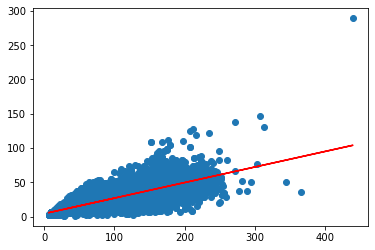

In [200]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [201]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[0.22639291]
4.321568162834556


### 